In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nb0lpwpYXEsbbo5uinX3")
project = rf.workspace("stonectassessment").project("stone_ct_assessment")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Stone_CT_Assessment-1 in yolov8:: 100%|██████████| 1098/1098 [00:00<00:00, 5983.64it/s]


In [ ]:
import yaml

# Specify the path to your .yaml file
file_path = "/content/Stone_CT_Assessment-1/data.yaml"

# Open and load the .yaml file
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

# Print the contents of the file
print(data)


{'names': ['Kidney', 'Stone'], 'nc': 2, 'roboflow': {'license': 'CC BY 4.0', 'project': 'stone_ct_assessment', 'url': 'https://universe.roboflow.com/stonectassessment/stone_ct_assessment/dataset/1', 'version': 1, 'workspace': 'stonectassessment'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [ ]:
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 22.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Paths to your dataset and model
data_yaml = "/content/Stone_CT_Assessment-1/data.yaml"  # Create this YAML file to define your dataset
model_save_path = "runs/detect/yolov8_kidney_stone"

# 1. Load the YOLOv11 model
model = YOLO("yolov8n.pt")  # Using YOLOv8 as YOLOv11 is currently based on Ultralytics core

# 2. Train the model
model.train(
    data=data_yaml,  # Path to the dataset YAML
    epochs=50,       # Number of epochs
    imgsz=640,       # Image size
    batch=16,        # Batch size
    name="kidney_stone.pt"  # Save results under this name
)

# 3. Evaluate the model
results = model.val()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 98.3MB/s]


Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Stone_CT_Assessment-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=kidney_stone.pt, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 20.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]


AMP: checks passed ✅


train: Scanning /content/Stone_CT_Assessment-1/train/labels... 325 images, 0 backgrounds, 0 corrupt: 100%|██████████| 325/325 [00:00<00:00, 2250.61it/s]

train: New cache created: /content/Stone_CT_Assessment-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Stone_CT_Assessment-1/valid/labels... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<00:00, 1021.94it/s]

val: New cache created: /content/Stone_CT_Assessment-1/valid/labels.cache


Plotting labels to runs/detect/kidney_stone.pt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/kidney_stone.pt
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.37G      1.293      3.144      1.258         39        640: 100%|██████████| 21/21 [00:11<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


                   all        135        490    0.00608      0.496      0.424      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.22G      1.236      1.601        1.1         31        640: 100%|██████████| 21/21 [00:05<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]


                   all        135        490    0.00615      0.477      0.169      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.26G      1.227      1.219      1.103         20        640: 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.00it/s]

                   all        135        490          1      0.101      0.498      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G      1.204      1.097      1.082         21        640: 100%|██████████| 21/21 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        135        490      0.997      0.305      0.429      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.23G      1.187      1.116      1.102         16        640: 100%|██████████| 21/21 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all        135        490      0.795        0.4      0.625       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.25G      1.251      1.046      1.094         33        640: 100%|██████████| 21/21 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]


                   all        135        490       0.77      0.615       0.67      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.24G       1.19      1.009      1.096         27        640: 100%|██████████| 21/21 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]

                   all        135        490      0.698      0.655       0.68      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G      1.147     0.9333      1.071         28        640: 100%|██████████| 21/21 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


                   all        135        490      0.753      0.723      0.712      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G      1.095     0.8047      1.038         24        640: 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]

                   all        135        490       0.72      0.661      0.666      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.26G      1.064      0.802      1.037         24        640: 100%|██████████| 21/21 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]


                   all        135        490       0.79      0.734      0.745      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.24G      1.107     0.7767      1.038         23        640: 100%|██████████| 21/21 [00:06<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]

                   all        135        490      0.789      0.724       0.72      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.23G      1.088     0.7529      1.052         15        640: 100%|██████████| 21/21 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]

                   all        135        490      0.797      0.749       0.72      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.25G      1.066     0.7461      1.019         14        640: 100%|██████████| 21/21 [00:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]

                   all        135        490      0.794      0.772       0.76      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.25G      1.048     0.6791      1.012         36        640: 100%|██████████| 21/21 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.06it/s]


                   all        135        490      0.837      0.774       0.78      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.24G      1.059     0.6682      1.025         43        640: 100%|██████████| 21/21 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]

                   all        135        490      0.789      0.742      0.774      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.23G      1.039     0.6495      1.011         22        640: 100%|██████████| 21/21 [00:04<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]

                   all        135        490      0.808      0.764      0.784      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.25G      1.037     0.6475      1.005         31        640: 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]

                   all        135        490      0.838      0.777      0.795      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.26G      1.004     0.6231      1.008         26        640: 100%|██████████| 21/21 [00:04<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]


                   all        135        490      0.814      0.772      0.786      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.23G     0.9686     0.5924     0.9862         18        640: 100%|██████████| 21/21 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.04it/s]

                   all        135        490      0.838      0.781      0.774      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.24G     0.9848     0.6084     0.9897         28        640: 100%|██████████| 21/21 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        135        490      0.841      0.789      0.794      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.23G     0.9801     0.5895      1.003         11        640: 100%|██████████| 21/21 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        135        490      0.863      0.797      0.814      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G     0.9858     0.6027     0.9945         16        640: 100%|██████████| 21/21 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        135        490      0.809      0.796      0.783      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.24G     0.9513     0.5679     0.9885         13        640: 100%|██████████| 21/21 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]

                   all        135        490       0.87      0.791      0.807      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.24G       0.93     0.5449     0.9703         26        640: 100%|██████████| 21/21 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all        135        490      0.881      0.785       0.81      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.22G     0.9448     0.5598     0.9983         19        640: 100%|██████████| 21/21 [00:07<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.99it/s]

                   all        135        490      0.855      0.772      0.796      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.25G     0.9505     0.5387     0.9913         38        640: 100%|██████████| 21/21 [00:04<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]

                   all        135        490      0.851      0.806      0.816       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.23G     0.9105     0.5192     0.9665         22        640: 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]

                   all        135        490      0.854      0.793      0.808      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.23G     0.9246     0.5272     0.9669         26        640: 100%|██████████| 21/21 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]

                   all        135        490      0.837      0.806      0.802      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.25G     0.9399     0.5272     0.9694         17        640: 100%|██████████| 21/21 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        135        490      0.861      0.785      0.813      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.26G     0.9197     0.5132     0.9595         31        640: 100%|██████████| 21/21 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

                   all        135        490       0.87      0.798      0.817      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.24G     0.9281     0.5267     0.9814         13        640: 100%|██████████| 21/21 [00:06<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        135        490      0.855      0.801      0.814      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.24G     0.9038     0.5133     0.9559         22        640: 100%|██████████| 21/21 [00:04<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]

                   all        135        490       0.83      0.796      0.804      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.22G     0.8853     0.4921     0.9522         32        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

                   all        135        490        0.8      0.804      0.803      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.25G      0.941     0.5002     0.9706         38        640: 100%|██████████| 21/21 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        135        490      0.837      0.796      0.802      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.23G      0.904     0.4867      0.961         18        640: 100%|██████████| 21/21 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        135        490      0.841      0.817      0.819      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.26G     0.8701     0.4796     0.9593         18        640: 100%|██████████| 21/21 [00:05<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.60it/s]

                   all        135        490      0.842      0.811      0.818       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.25G     0.8706     0.4752     0.9661         12        640: 100%|██████████| 21/21 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        135        490      0.861      0.802       0.82       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.26G     0.8724     0.4634     0.9547         34        640: 100%|██████████| 21/21 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all        135        490      0.844      0.806       0.81      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.24G     0.8795     0.4737     0.9523         35        640: 100%|██████████| 21/21 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        135        490      0.822      0.818      0.815      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.23G     0.8649     0.4575     0.9554         29        640: 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

                   all        135        490      0.808       0.82      0.807      0.539


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.22G     0.8606     0.4547     0.9511         15        640: 100%|██████████| 21/21 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all        135        490      0.814      0.822      0.814      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.23G     0.8465     0.4455     0.9533         17        640: 100%|██████████| 21/21 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]

                   all        135        490      0.832       0.82      0.821       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.21G      0.845     0.4369     0.9434         15        640: 100%|██████████| 21/21 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        135        490      0.858      0.817      0.826      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.23G     0.8304     0.4236     0.9499         16        640: 100%|██████████| 21/21 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        135        490      0.874      0.813      0.829      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.2G     0.8091     0.4102     0.9281         16        640: 100%|██████████| 21/21 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all        135        490      0.857      0.813      0.827      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.23G     0.8096     0.4158     0.9219         16        640: 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]

                   all        135        490      0.872      0.813      0.838       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.21G     0.8136     0.4272     0.9362         15        640: 100%|██████████| 21/21 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        135        490      0.885      0.801      0.832      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.24G     0.7941     0.4039     0.9198         14        640: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        135        490       0.86      0.811       0.83      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.23G     0.7999     0.3997     0.9232         17        640: 100%|██████████| 21/21 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.39it/s]

                   all        135        490      0.858      0.808      0.825      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.21G     0.7902     0.3997     0.9168         20        640: 100%|██████████| 21/21 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        135        490      0.856      0.803      0.826      0.557



50 epochs completed in 0.117 hours.
Optimizer stripped from runs/detect/kidney_stone.pt/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/kidney_stone.pt/weights/best.pt, 6.2MB

Validating runs/detect/kidney_stone.pt/weights/best.pt...
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


                   all        135        490      0.872      0.813      0.838       0.56
                Kidney        135        260      0.992      0.996      0.995       0.82
                 Stone        135        230      0.752       0.63      0.681      0.301
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/kidney_stone.pt
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Stone_CT_Assessment-1/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]


                   all        135        490      0.891      0.796      0.833       0.56
                Kidney        135        260      0.993      0.996      0.995      0.819
                 Stone        135        230      0.789      0.596      0.672        0.3
Speed: 0.5ms preprocess, 6.2ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/kidney_stone.pt2


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

def plot_ground_truth(image_path, label_path):
    """
    Plots the ground-truth bounding boxes from the label file on the given image.
    """
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read label file and draw boxes
    with open(label_path, "r") as file:
        for line in file:
            data = line.strip().split()
            cls, cx, cy, w, h = map(float, data)

            # Convert normalized coordinates (cx, cy, w, h) to pixel coordinates
            height, width, _ = img.shape
            x1 = int((cx - w / 2) * width)
            y1 = int((cy - h / 2) * height)
            x2 = int((cx + w / 2) * width)
            y2 = int((cy + h / 2) * height)

            # Draw the bounding box (green for ground-truth)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, "tumor (GT)", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Ground Truth")
    plt.show()

    return img


def test_model(image_path, model_path="/content/runs/detect/kidney_stone.pt/weights/best.pt"):
    """
    Uses the trained YOLOv8 model to predict bounding boxes on the given image.
    """
    # Load the trained model
    model = YOLO(model_path)

    # Run inference on the image
    results = model.predict(source=image_path, save=True)

    # Check if image0.jpg is created
    result_img_path = "/content/runs/detect/predict4/image-0033_jpg.rf.72c970c29fbe513a8c51b5b7012d0dec.jpg"
    if not os.path.exists(result_img_path):
        print(f"Error: {result_img_path} does not exist.")
        return

    # Visualize predictions
    results_img = cv2.imread(result_img_path)
    if results_img is None:
        print(f"Error: Failed to read {result_img_path}.")
        return

    results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(results_img)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()



# Paths to image and label file
image_path = "/content/Liver-Tumor-Detection-2/valid/images/image-0033_jpg.rf.72c970c29fbe513a8c51b5b7012d0dec.jpg"  # Replace with the image path
label_path = "/content/Liver-Tumor-Detection-2/valid/labels/image-0033_jpg.rf.72c970c29fbe513a8c51b5b7012d0dec.txt"  # Replace with the corresponding label file path

# 1. Plot Ground Truth
gt_img = plot_ground_truth(image_path, label_path)

# 2. Test the Model
test_model(image_path)



image 1/1 /content/stone_2.jpg: 544x640 2 Kidneys, 5 Stones, 7.9ms
Speed: 2.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


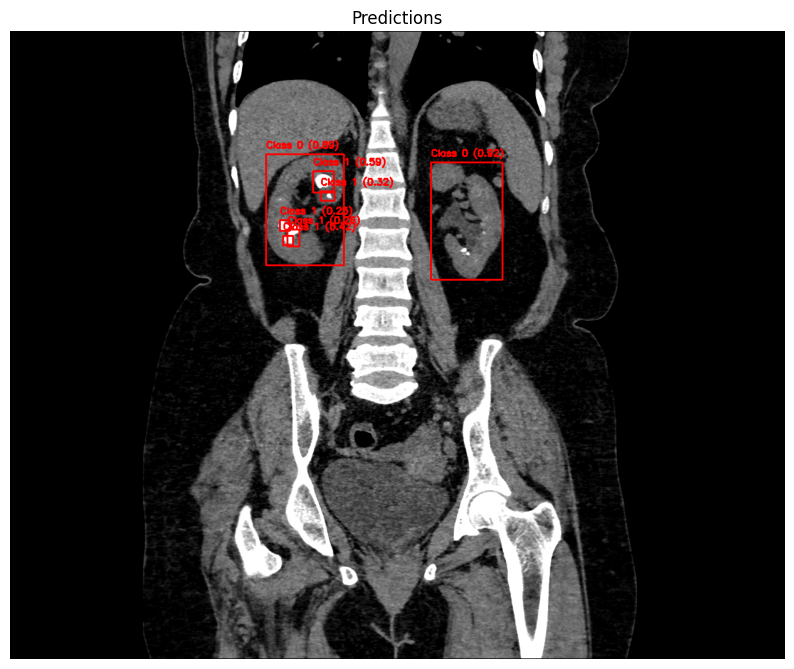

Output image saved as output1.jpg


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def test_model(image_path, model_path="/content/runs/detect/kidney_stone.pt/weights/best.pt"):
    """
    Uses the trained YOLOv8 model to predict bounding boxes on the given image.
    The output image is saved as 'output1.jpg' with bounding boxes drawn.
    """
    # Load the trained model
    model = YOLO(model_path)

    # Run inference on the image
    results = model.predict(source=image_path, save=False)  # Do not save in 'runs/detect/'

    # Extract bounding boxes, labels, and confidences
    boxes = results[0].boxes.xyxy  # Get the bounding box coordinates
    labels = results[0].boxes.cls  # Get the class labels
    confidences = results[0].boxes.conf  # Get the confidence scores

    # Load the image
    img = cv2.imread(image_path)

    # Loop through the results and draw the bounding boxes on the image
    for i in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[i])  # Convert box coordinates to integers
        label = int(labels[i])  # Convert label to integer
        confidence = confidences[i]  # Confidence score

        # Draw the bounding box (Blue for bounding box, Red for the label)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red rectangle
        text = f"Class {label} ({confidence:.2f})"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Save the image with bounding boxes as 'output1.jpg'
    output_path = "output1.jpg"
    cv2.imwrite(output_path, img)

    # Visualize predictions
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()

    print(f"Output image saved as {output_path}")


# Example usage
image_path = "/content/stone_2.jpg"  # Replace with your image path

# Test the Model and save the result as output1.jpg
test_model(image_path)



image 1/1 /content/stone_2.jpg: 544x640 2 Kidneys, 5 Stones, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


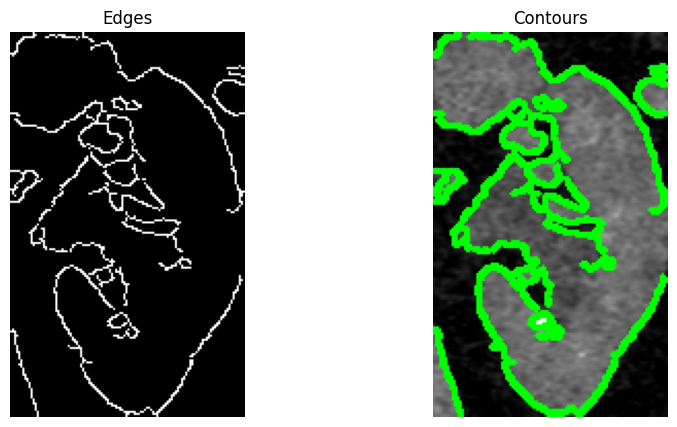

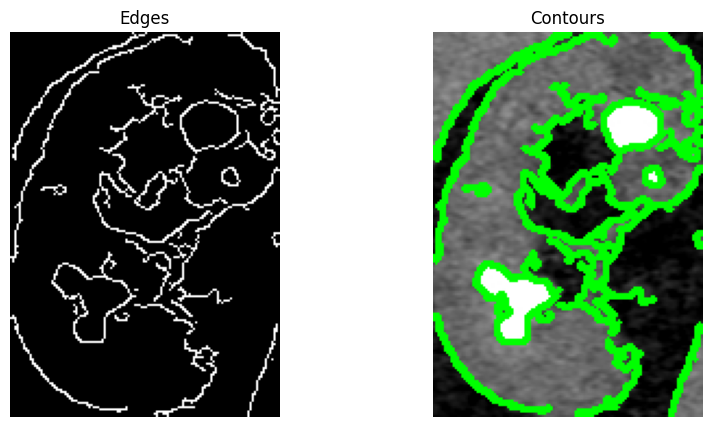

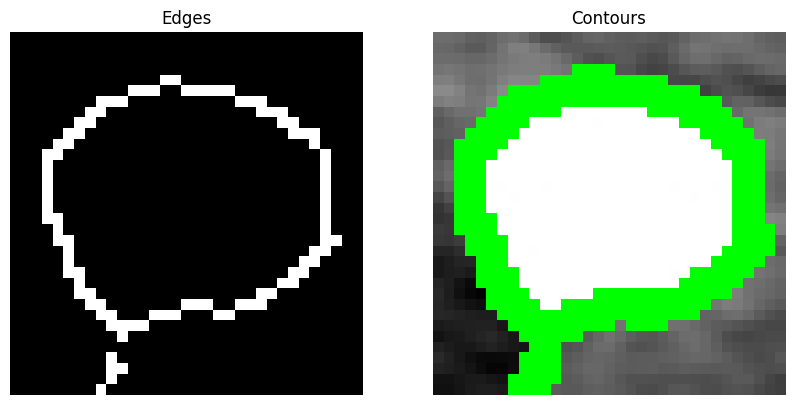

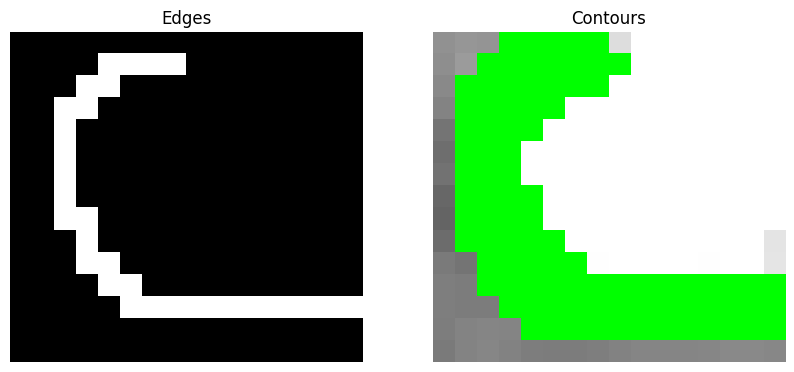

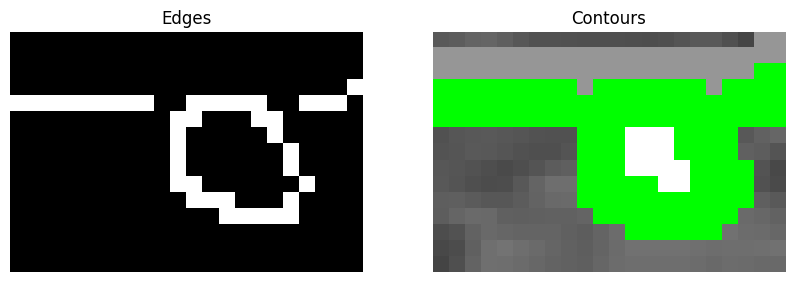

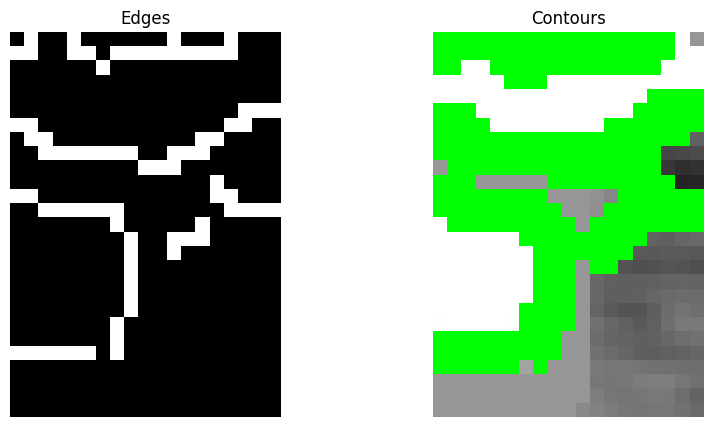

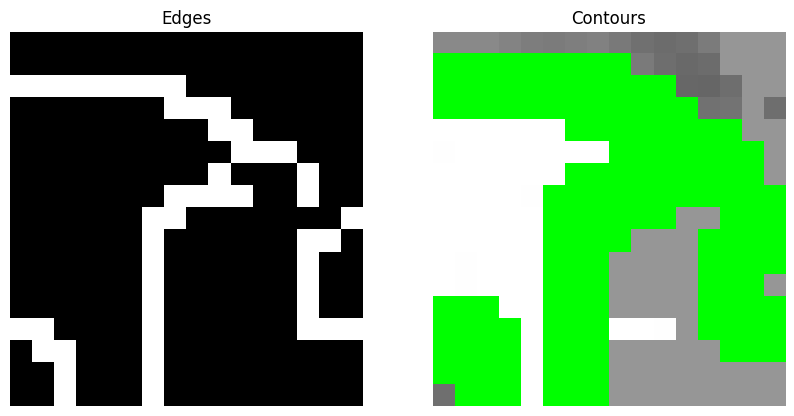

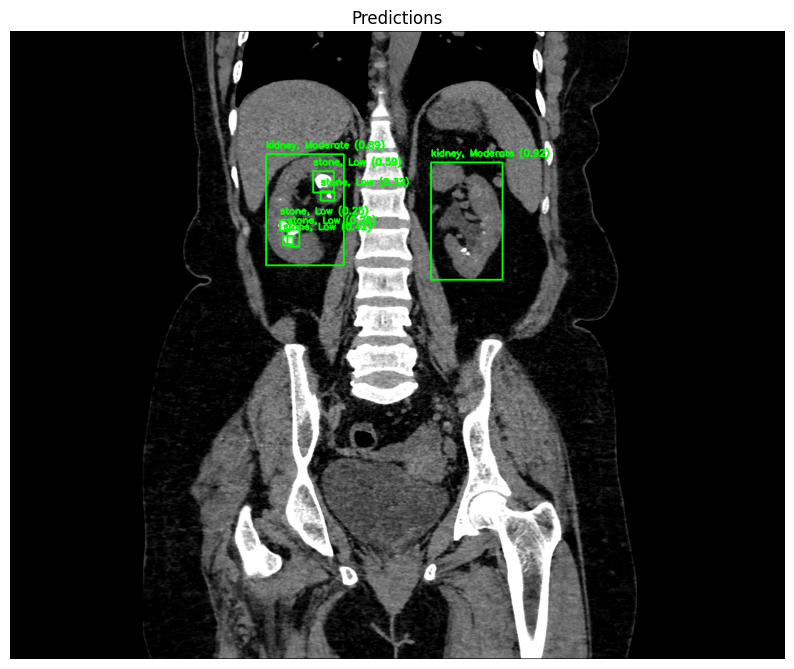

Output image saved as output.jpg

Tumor Details:
Tumor 1: {'label': 'kidney', 'confidence': 0.92, 'area': 1492.35, 'size': '30.16mm x 49.48mm', 'location': 'Upper Right lobe', 'severity': 'Moderate', 'shape': 'elongated (horizontal)', 'tumor_area': 219.0, 'tumor_perimeter': 202.31}
Tumor 2: {'label': 'kidney', 'confidence': 0.89, 'area': 1536.46, 'size': '32.81mm x 46.83mm', 'location': 'Upper Left lobe', 'severity': 'Moderate', 'shape': 'irregular', 'tumor_area': 653.5, 'tumor_perimeter': 176.07}
Tumor 3: {'label': 'stone', 'confidence': 0.59, 'area': 78.54, 'size': '8.73mm x 9.00mm', 'location': 'Upper Left lobe', 'severity': 'Low', 'shape': 'circular', 'tumor_area': 466.0, 'tumor_perimeter': 85.25}
Tumor 4: {'label': 'stone', 'confidence': 0.42, 'area': 16.8, 'size': '4.23mm x 3.97mm', 'location': 'Upper Left lobe', 'severity': 'Low', 'shape': 'irregular', 'tumor_area': 6.0, 'tumor_perimeter': 50.97}
Tumor 5: {'label': 'stone', 'confidence': 0.32, 'area': 23.1, 'size': '5.82mm x 3.9

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

def carve_tumor_edges(image, x1, y1, x2, y2):
    """
    Carves out the exact edges of the tumor within the bounding box.
    """
    # Crop the ROI from the bounding box
    roi = image[y1:y2, x1:x2]

    # Convert to grayscale
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_roi = cv2.GaussianBlur(gray_roi, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred_roi, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the ROI for visualization
    contour_img = cv2.cvtColor(gray_roi, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

    # Calculate tumor shape metrics
    tumor_area = 0
    tumor_perimeter = 0
    shape = "Unknown"
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        tumor_area = cv2.contourArea(largest_contour)
        tumor_perimeter = cv2.arcLength(largest_contour, True)

        # Calculate shape characteristics
        x, y, w, h = cv2.boundingRect(largest_contour)
        aspect_ratio = float(w) / h
        circularity = 4 * np.pi * (tumor_area / (tumor_perimeter ** 2))

        if circularity > 0.8:
            shape = "circular"
        elif aspect_ratio > 1.2:
            shape = "elongated (horizontal)"
        elif aspect_ratio < 0.8:
            shape = "elongated (vertical)"
        else:
            shape = "irregular"

    # Display the edges and contours
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(contour_img)
    plt.title("Contours")
    plt.axis("off")
    plt.show()

    return tumor_area, tumor_perimeter, shape


def test_model(image_path, model_path="/content/runs/detect/kidney_stone.pt/weights/best.pt"):
    """
    Enhances the YOLO model predictions by calculating tumor size, location, shape, severity, and count.
    """
    # Load the trained model
    model = YOLO(model_path)

    # Run inference on the image
    results = model.predict(source=image_path, save=False)

    # Load the image
    img = cv2.imread(image_path)

    # Tumor details
    kidney_details = []

    # Loop through results and process each bounding box
    for detection in results[0].boxes.data:  # Each detection
        # Extract bounding box coordinates and details
        x1, y1, x2, y2 = map(int, detection[:4])  # Bounding box coordinates
        confidence = float(detection[4])  # Confidence score
        label = int(detection[5])  # Class label


        kidney_label = " "

        if label == 0:
            kidney_label = "kidney"
        else:
            kidney_label = "stone"


        # Calculate size (area) of the tumor
        width = (x2 - x1) * 0.2645833333
        height = (y2 - y1) * 0.2645833333
        area = width * height

        # Get tumor shape and metrics
        kidney_area, kidney_perimeter, shape = carve_tumor_edges(img, x1, y1, x2, y2)

        # Determine severity based on tumor size
        if area < 1000:
            severity = "Low"
        elif 1000 <= area < 5000:
            severity = "Moderate"
        else:
            severity = "High"

        # Determine tumor location (e.g., divide liver into quadrants)
        center_x, center_y = (x1 + x2) // 2, (y1 + y2) // 2
        if center_x < img.shape[1] // 2 and center_y < img.shape[0] // 2:
            location = "Upper Left lobe"
        elif center_x >= img.shape[1] // 2 and center_y < img.shape[0] // 2:
            location = "Upper Right lobe"
        elif center_x < img.shape[1] // 2 and center_y >= img.shape[0] // 2:
            location = "Lower Left lobe"
        else:
            location = "Lower Right lobe"

        # Append details
        kidney_details.append({
            "label": kidney_label,
            "confidence": round(confidence, 2),
            "area": round(area, 2),
            "size": f"{width:.2f}mm x {height:.2f}mm",
            "location": location,
            "severity": severity,
            "shape": shape,
            "tumor_area": round(kidney_area, 2),
            "tumor_perimeter": round(kidney_perimeter, 2)
        })

        # Draw the bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{kidney_label}, {severity} ({confidence:.2f})"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the image with bounding boxes as 'output.jpg'
    output_path = "output.jpg"
    cv2.imwrite(output_path, img)

    # Visualize predictions
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()

    print(f"Output image saved as {output_path}")
    print("\nTumor Details:")
    for i, tumor in enumerate(kidney_details, 1):
        print(f"Tumor {i}: {tumor}")


# Example usage
image_path = "/content/stone_2.jpg"
test_model(image_path)


image 1/1 /content/stone_2.jpg: 544x640 2 Kidneys, 5 Stones, 8.0ms
Speed: 3.1ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


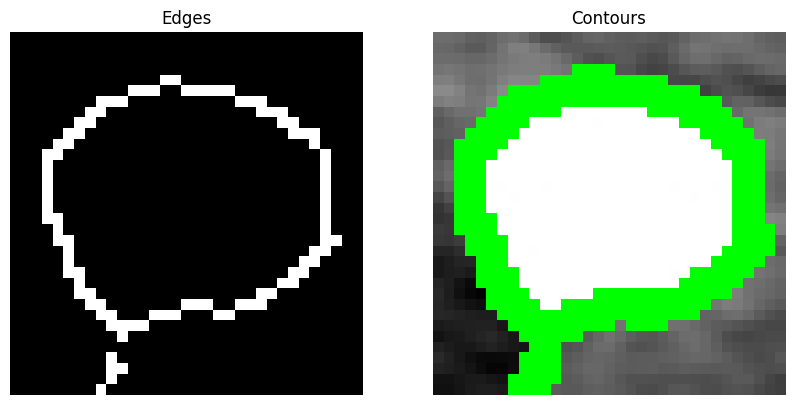

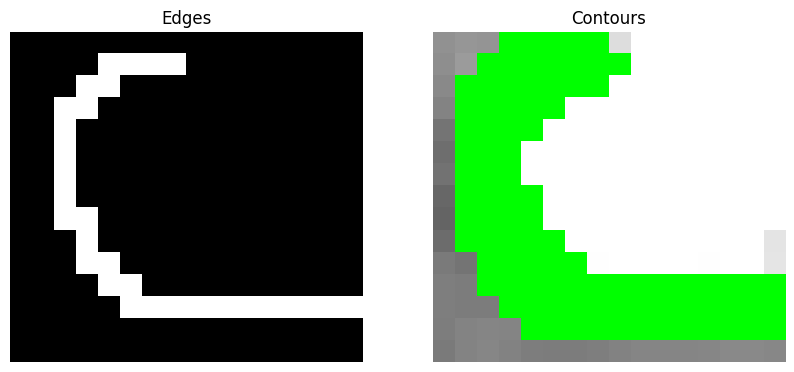

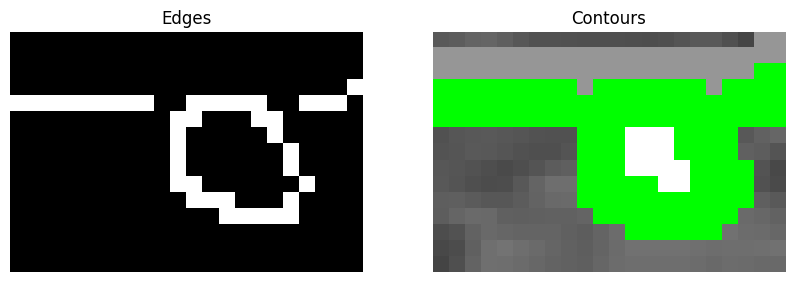

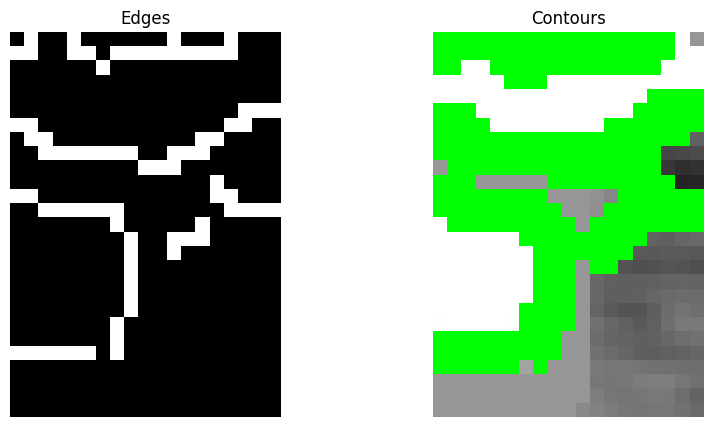

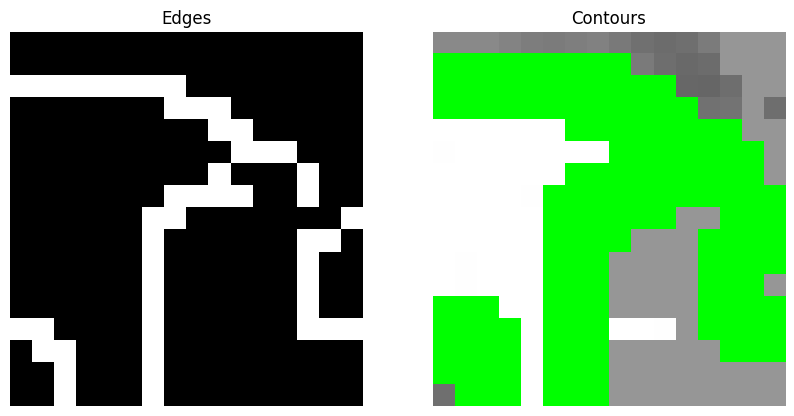

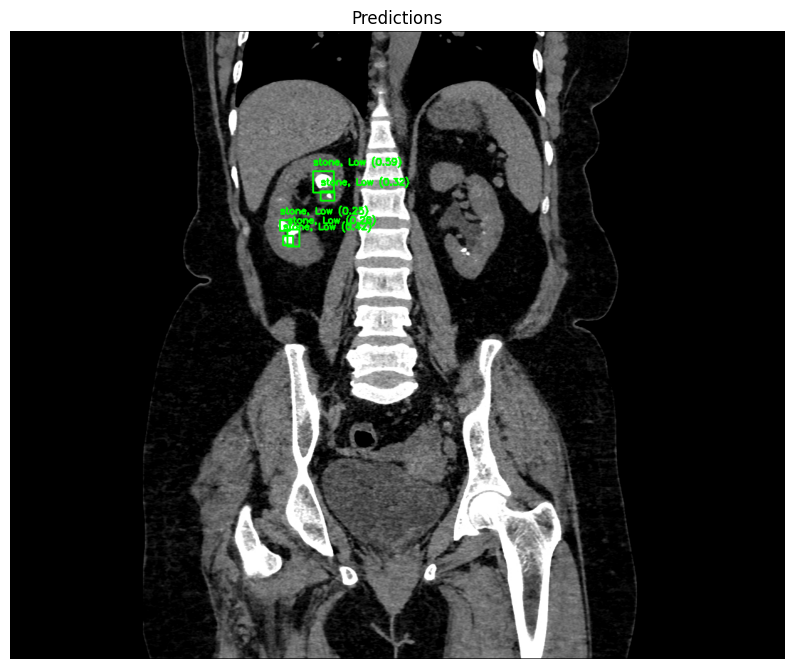

Output image saved as output.jpg

Stone Details:
Stone 1: {'label': 'stone', 'confidence': 0.59, 'area': 78.54, 'size': '8.73mm x 9.00mm', 'location': 'Upper Left lobe', 'severity': 'Low', 'shape': 'circular', 'stone_area': 466.0, 'stone_perimeter': 85.25}
Stone 2: {'label': 'stone', 'confidence': 0.42, 'area': 16.8, 'size': '4.23mm x 3.97mm', 'location': 'Upper Left lobe', 'severity': 'Low', 'shape': 'irregular', 'stone_area': 6.0, 'stone_perimeter': 50.97}
Stone 3: {'label': 'stone', 'confidence': 0.32, 'area': 23.1, 'size': '5.82mm x 3.97mm', 'location': 'Upper Left lobe', 'severity': 'Low', 'shape': 'circular', 'stone_area': 43.5, 'stone_perimeter': 25.9}
Stone 4: {'label': 'stone', 'confidence': 0.26, 'area': 35.91, 'size': '5.03mm x 7.14mm', 'location': 'Upper Left lobe', 'severity': 'Low', 'shape': 'elongated (horizontal)', 'stone_area': 5.0, 'stone_perimeter': 41.8}
Stone 5: {'label': 'stone', 'confidence': 0.25, 'area': 19.04, 'size': '4.23mm x 4.50mm', 'location': 'Upper Left

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

def test_model(image_path, model_path="/content/runs/detect/kidney_stone.pt/weights/kidney_stone.pt"):
    """
    Enhances the YOLO model predictions by calculating stone size, location, shape, severity, and count.
    """

    # Load the trained model
    model = YOLO(model_path)

    # Run inference on the image
    results = model.predict(source=image_path, save=False)

    # Load the image
    img = cv2.imread(image_path)

    # Stone details
    stone_details = []

    # Loop through results and process each bounding box
    for detection in results[0].boxes.data:  # Each detection
        # Extract bounding box coordinates and details
        x1, y1, x2, y2 = map(int, detection[:4])  # Bounding box coordinates
        confidence = float(detection[4])  # Confidence score
        label = int(detection[5])  # Class label


        # Assign labels: 0 = kidney, 1 = stone
        kidney_label = ""
        if label == 0:
            kidney_label = "kidney"
        else:
            kidney_label = "stone"

        # Process only stones
        if kidney_label == "stone":
            # Calculate size (area) of the stone
            width = (x2 - x1) * 0.2645833333  # Conversion to mm
            height = (y2 - y1) * 0.2645833333  # Conversion to mm
            area = width * height

            # Get stone shape and metrics
            stone_area, stone_perimeter, shape = carve_tumor_edges(img, x1, y1, x2, y2)

            # Determine severity based on stone size
            if area < 1000:
                severity = "Low"
            elif 1000 <= area < 5000:
                severity = "Moderate"
            else:
                severity = "High"

            # Determine stone location (e.g., divide kidney into quadrants)
            center_x, center_y = (x1 + x2) // 2, (y1 + y2) // 2
            if center_x < img.shape[1] // 2 and center_y < img.shape[0] // 2:
                location = "Upper Left lobe"
            elif center_x >= img.shape[1] // 2 and center_y < img.shape[0] // 2:
                location = "Upper Right lobe"
            elif center_x < img.shape[1] // 2 and center_y >= img.shape[0] // 2:
                location = "Lower Left lobe"
            else:
                location = "Lower Right lobe"

            # Append details
            stone_details.append({
                "label": kidney_label,
                "confidence": round(confidence, 2),
                "area": round(area, 2),
                "size": f"{width:.2f}mm x {height:.2f}mm",
                "location": location,
                "severity": severity,
                "shape": shape,
                "stone_area": round(stone_area, 2),
                "stone_perimeter": round(stone_perimeter, 2)
            })

            # Draw the bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            text = f"{kidney_label}, {severity} ({confidence:.2f})"
            cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save the image with bounding boxes as 'output.jpg'
    output_path = "output.jpg"
    cv2.imwrite(output_path, img)

    # Visualize predictions
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()

    print(f"Output image saved as {output_path}")
    print("\nStone Details:")
    for i, stone in enumerate(stone_details, 1):
        print(f"Stone {i}: {stone}")

image_path = "/content/stone_2.jpg"
test_model(image_path)

